# Graphs for sc92_1
DeepVenn pulled from Christine's Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from upsetplot import UpSet

### Bar Graph for Total Doublets of Three Methods

Text(0.5, 1.0, 'Total Doublets Detected by Each Tool')

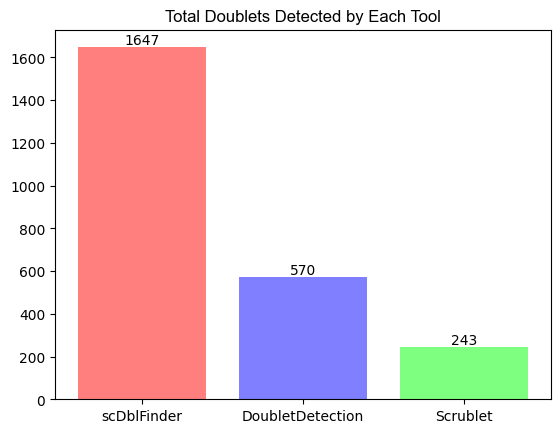

In [26]:
detection_methods = ['scDblFinder', 'DoubletDetection', 'Scrublet']
total = [1647, 570, 243]
colors = ['red', 'blue', 'lime']
opacity = 0.5

plt.bar(detection_methods, total, color=colors, alpha=opacity)
for i, value in enumerate(total):
    plt.text(i, value + 15, str(value), ha='center', fontsize=10)
plt.title('Total Doublets Detected by Each Tool', fontname='Arial')
# plt.xlabel('Tools', fontname='Arial')
# plt.ylabel('Total Count', fontname='Arial')

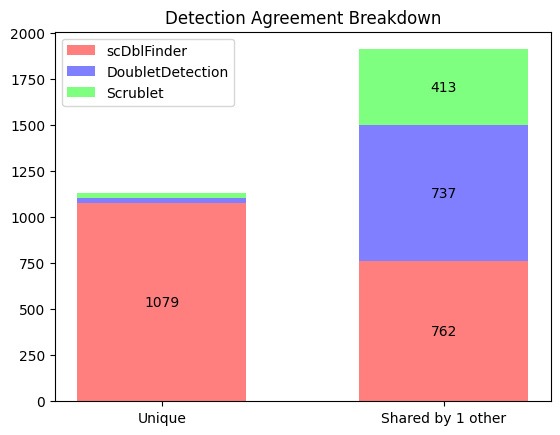

In [27]:
N = 2
breakdown = ['Unique', 'Shared by 1 other']
scDblFinder_stats = np.array([1079, 762])
dbldetect_stats = np.array([27, 737])
scrublet_stats = np.array([24, 413])
opacity = 0.5

fig, ax = plt.subplots()
ind = np.arange(N)  
width = 0.6

p1 = ax.bar(ind, scDblFinder_stats, width, label='scDblFinder', color='red', alpha=opacity)
p2 = ax.bar(ind, dbldetect_stats, width, bottom=scDblFinder_stats, label='DoubletDetection', color='blue', alpha=opacity)
p3 = ax.bar(ind, scrublet_stats, width, bottom=scDblFinder_stats + dbldetect_stats, label='Scrublet', color='lime', alpha=opacity)

for i in range(N): 
    if i == 0:
        ax.text(ind[i], scDblFinder_stats[i] / 2, f'{scDblFinder_stats[i]}', ha='center', va='center', color='black')
        continue

    ax.text(ind[i], scDblFinder_stats[i] / 2, f'{scDblFinder_stats[i]}', ha='center', va='center', color='black')
    ax.text(ind[i], scDblFinder_stats[i] + (dbldetect_stats[i] / 2), f'{dbldetect_stats[i]}', ha='center', va='center', color='black')
    ax.text(ind[i], scDblFinder_stats[i] + dbldetect_stats[i] + (scrublet_stats[i] / 2), f'{scrublet_stats[i]}', ha='center', va='center', color='black')

ax.set_xticks(ind)  
ax.set_xticklabels(breakdown)


ax.set_title('Detection Agreement Breakdown')
ax.legend()

plt.show()

### Overall Comparison (Using DeepVenn)
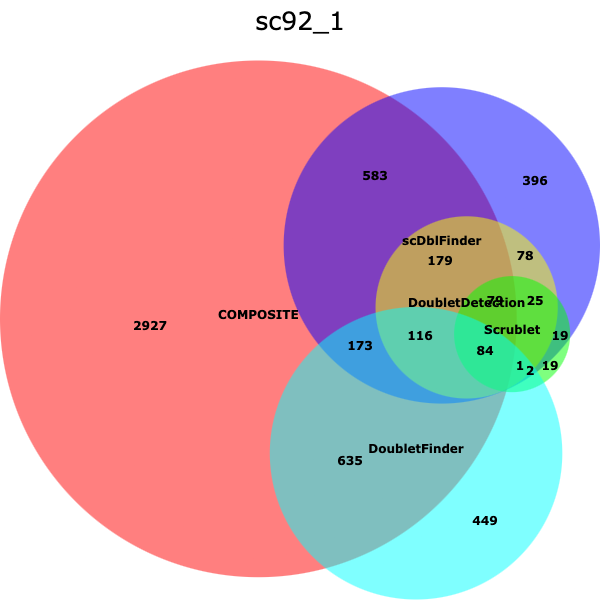

Which brings us to more questions: 
- There are more overlaps in the Scrublet/scDblFinder/DoubletDetection region, but how much of DoubletFinder/COMPOSITE is accurately identifying doublets that the aforementioned methods missed?
- With the absence of a ground truth, it's difficult to confirm how much of COMPOSITE's doublets (or any other results) are erroneously classified. What is our next step in *correctly* identifying doublets (e.g. using a dotplot to manually identify doublets)?

### Compiled Results

Text(0.5, 1.0, 'Total Doublets Detected by Each Tool for sc_92_1')

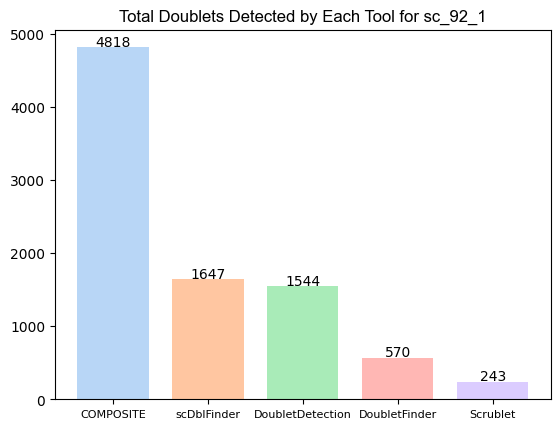

In [28]:
detection_methods = ['COMPOSITE', 'scDblFinder', 'DoubletDetection', 'DoubletFinder', 'Scrublet']
total = [4818, 1647, 1544, 570, 243]
colors = sns.color_palette('pastel')
opacity = 0.75
width = 0.75

plt.bar(detection_methods, total, color=colors, alpha=opacity, width=width)
plt.tick_params(axis='x', which='major', labelsize=8)
for i, value in enumerate(total):
    plt.text(i, value + 15, str(value), ha='center', fontsize=10)
plt.title('Total Doublets Detected by Each Tool for sc_92_1', fontname='Arial')
# plt.xlabel('Tools', fontname='Arial')
# plt.ylabel('Total Count', fontname='Arial')

### UpSetPlot

In [3]:
def txt_to_array(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            array = [line.strip() for line in lines]
        return array
    except FileNotFoundError:
        return "File not found."

#### sc92_1 Data Set

In [4]:
vaeda_id_path = data_path = r"./IDs/vaeda_sc92_1_ids.txt"
vaeda_ids = txt_to_array(vaeda_id_path)
composite_id_path = data_path = r"./IDs/composite_sc92_1_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_sc92_1_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/DblDetect_sc92_1_leiden_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/DoubletFinder_sc92_1_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/scrublet_sc92_1_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

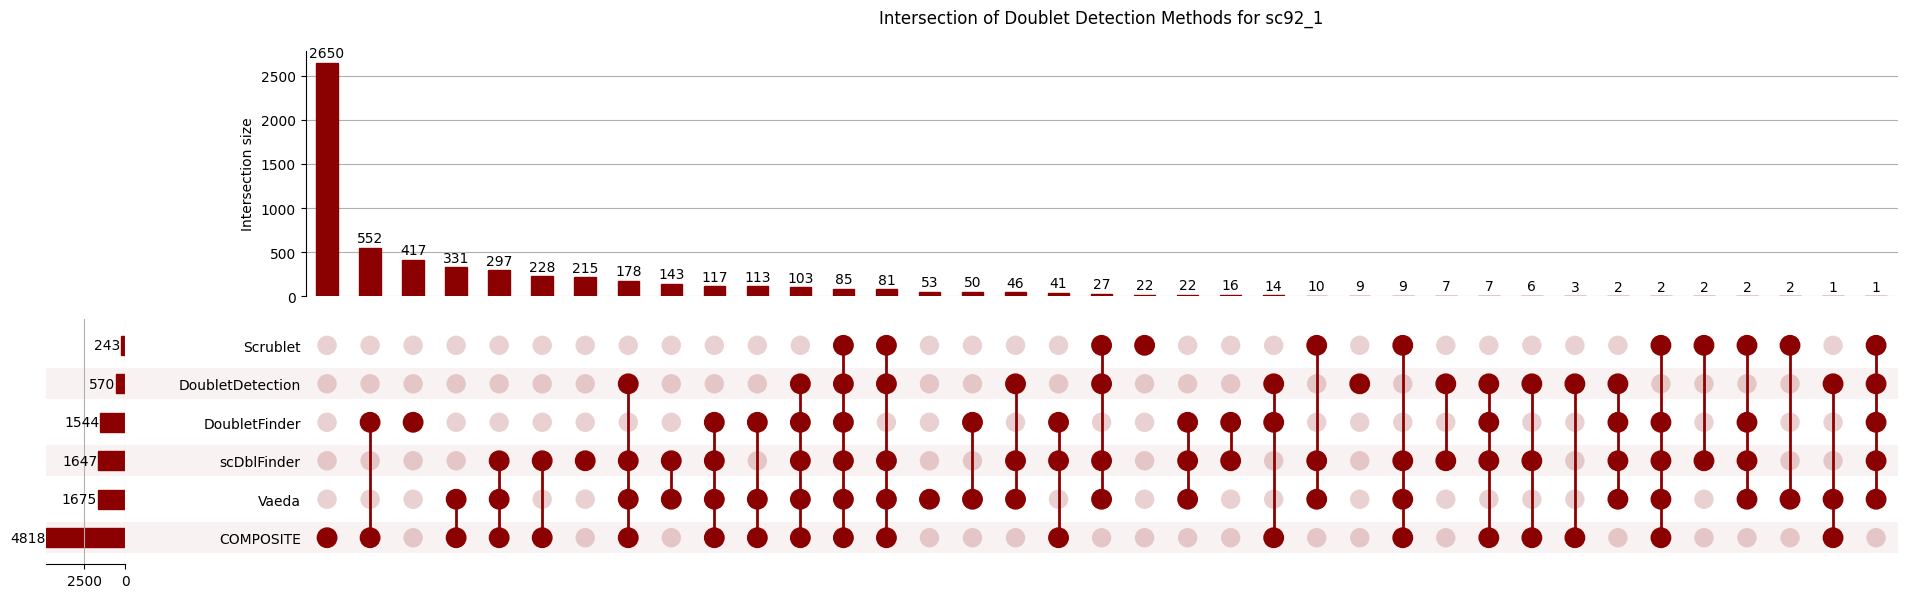

In [5]:
vaeda_ids = set(vaeda_ids)
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)

sets_dict = {
    'Vaeda' : set(vaeda_ids),
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='darkred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc92_1', pad=20)
plt.savefig("sc92_1.png")

#### sc92_2 Data Set

In [32]:
composite_id_path = data_path = r"./IDs/composite_sc92_2_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_sc92_2_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/DblDetect_sc92_2_leiden_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/DoubletFinder_sc92_2_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/scrublet_sc92_2_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

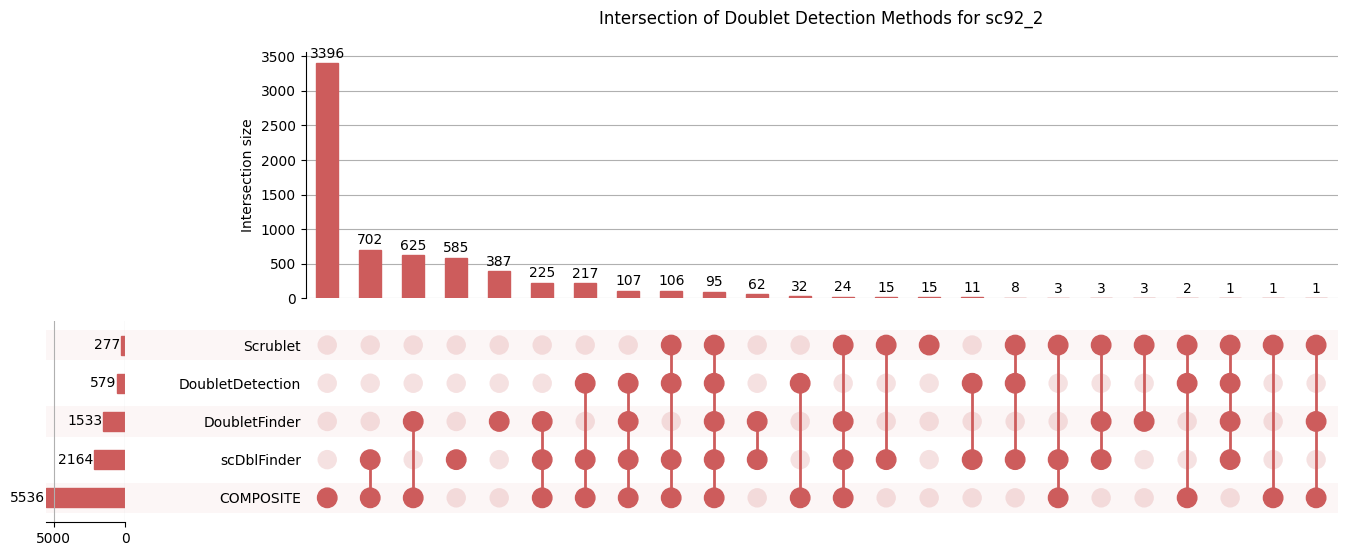

In [33]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc92_2', pad=20)
plt.savefig("sc92_2.png")

#### sc92_3 Data Set

In [6]:
vaeda_id_path = data_path = r"./IDs/vaeda_sc92_3_ids.txt"
vaeda_ids = txt_to_array(vaeda_id_path)
composite_id_path = data_path = r"./IDs/composite_sc92_3_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_sc92_3_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/DblDetect_sc92_3_leiden_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/DoubletFinder_sc92_3_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/scrublet_sc92_3_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

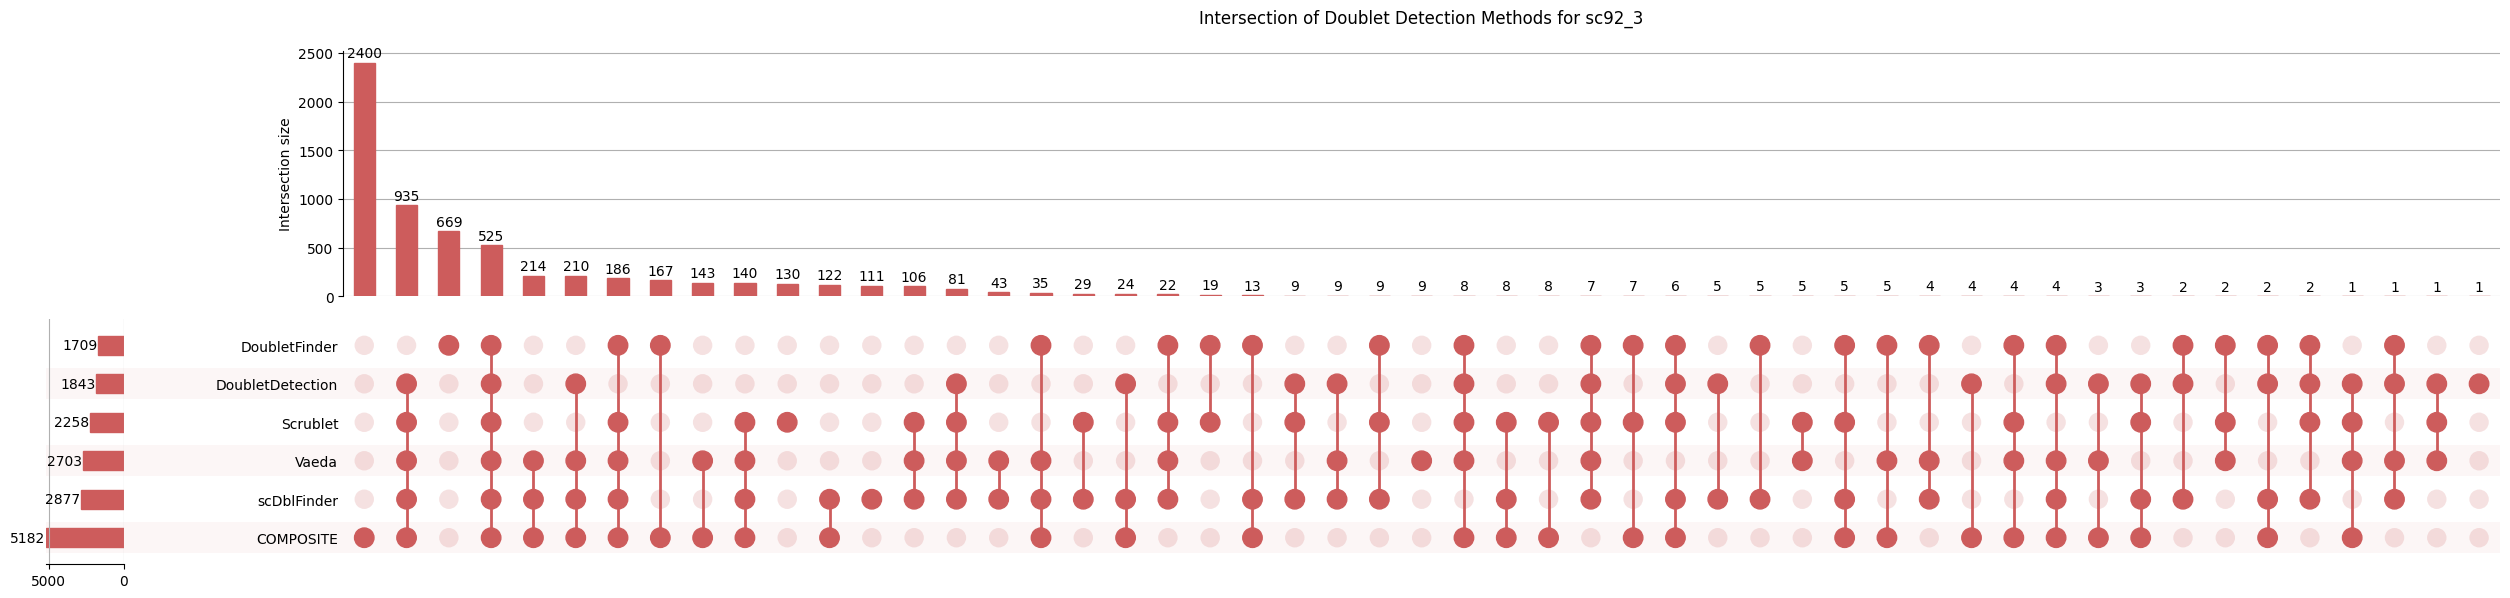

In [8]:
vaeda_ids = set(vaeda_ids)
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)

sets_dict = {
    'Vaeda' : set(vaeda_ids),
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc92_3', pad=20)
plt.savefig("sc92_3.png")

#### PBMC Data Set

In [36]:
composite_id_path = data_path = r"./IDs/composite_pbmc_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_pbmc_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/dblDetect_pbmc_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/dblFinder_pbmc_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/scrublet_pbmc_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
pbmc_id_path = data_path = r"./IDs/ch_pbmc_annotated_ids.txt"
pbmc_ids = txt_to_array(pbmc_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

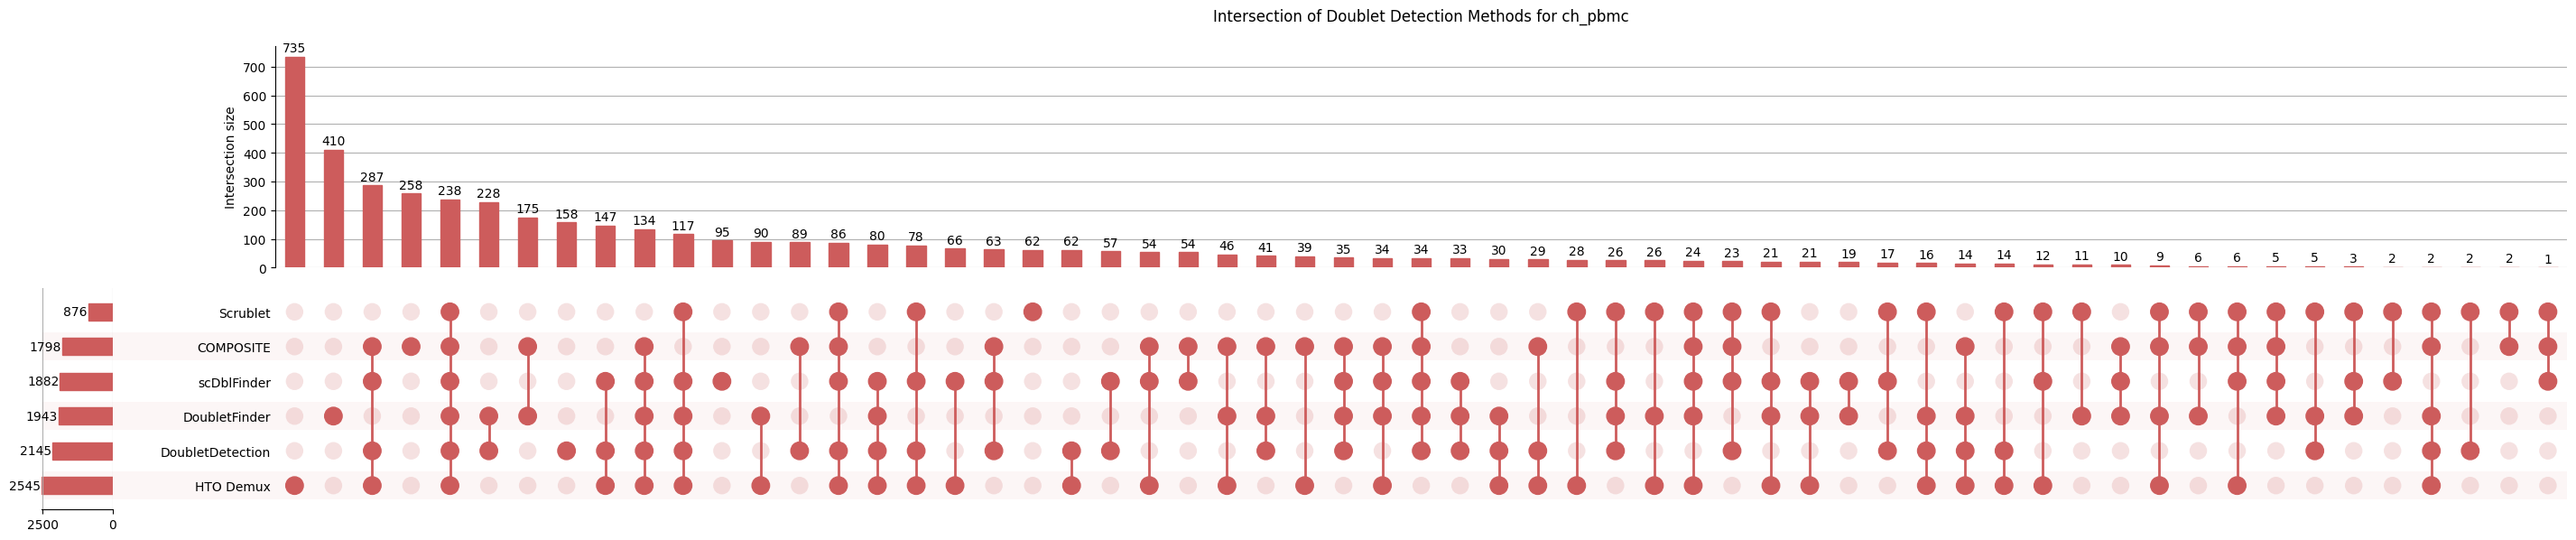

In [37]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)
pbmc_ids = set(pbmc_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids),
    'HTO Demux' : set(pbmc_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for ch_pbmc', pad=20)
plt.savefig("pbmc.png")

#### sc85_1g Data Set

In [18]:
composite_id_path = data_path = r"./IDs/COMPOSITE_sc85_1g_atac_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_sc85_1g_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/DblDetect_sc85_1g_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/DoubletFinder_sc85_1g_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/Scrublet_sc85_1g_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
vaeda_id_path = data_path = r"./IDs/vaeda_sc85_1g_ids.txt"
vaeda_ids = txt_to_array(vaeda_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

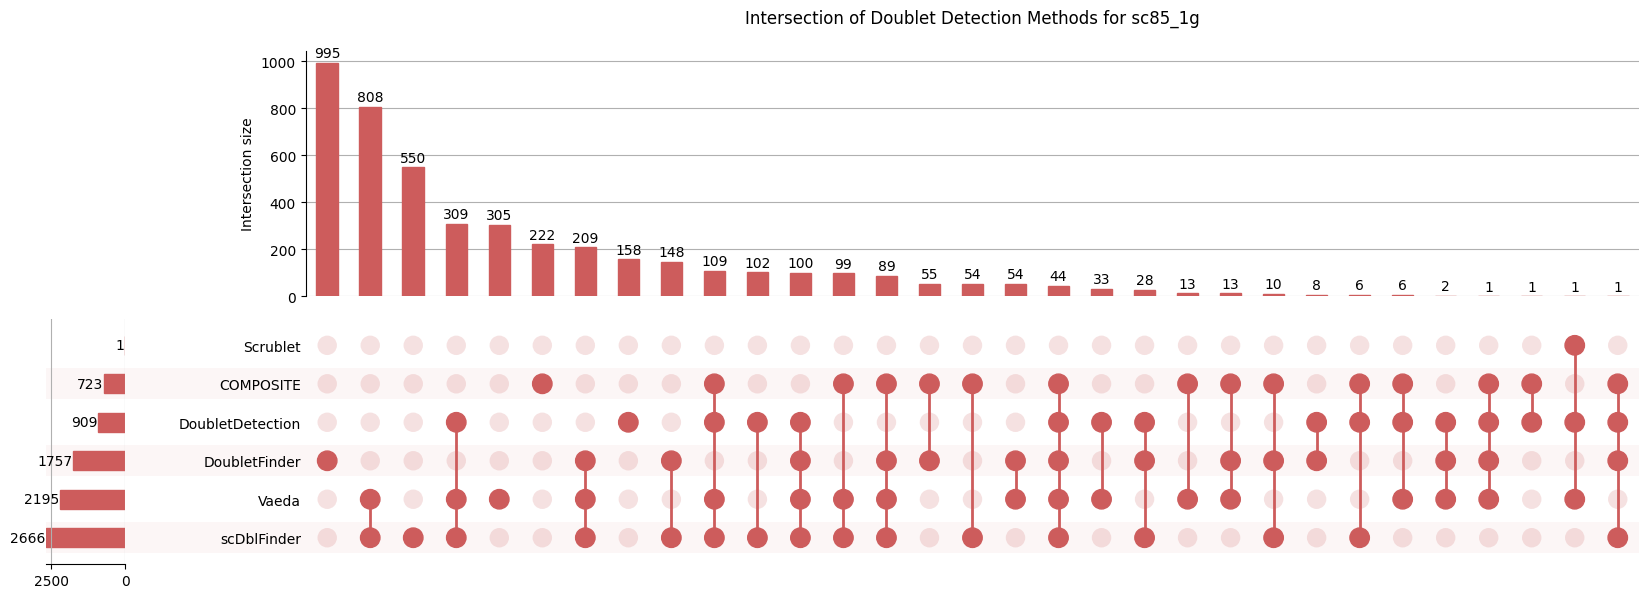

In [19]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)
vaeda_ids = set(vaeda_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids),
    'Vaeda' : set(vaeda_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_1g', pad=20)
plt.savefig("sc85_1g_UPSET.png")

In [20]:
print(len(all_cells))

4533


In [21]:
union_cells = np.array(all_cells)
np.save('doublets_sc85_1g.npy', union_cells)

#### Pseudo 1.0

In [8]:
composite_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/COMPOSITE_sc85_1g_pseudo_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/scDblFinder_sc85_1g_pseudo_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/DoubletDetection_sc85_1g_pseudo_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
scrublet_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/Scrublet_sc85_1g_pseudo_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
pseudo_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/pseudo_sc85_1g_ids.txt"
pseudo_ids = txt_to_array(pseudo_id_path)
dblfinder_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/DoubletFinder_pseudo_sc85_1g_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

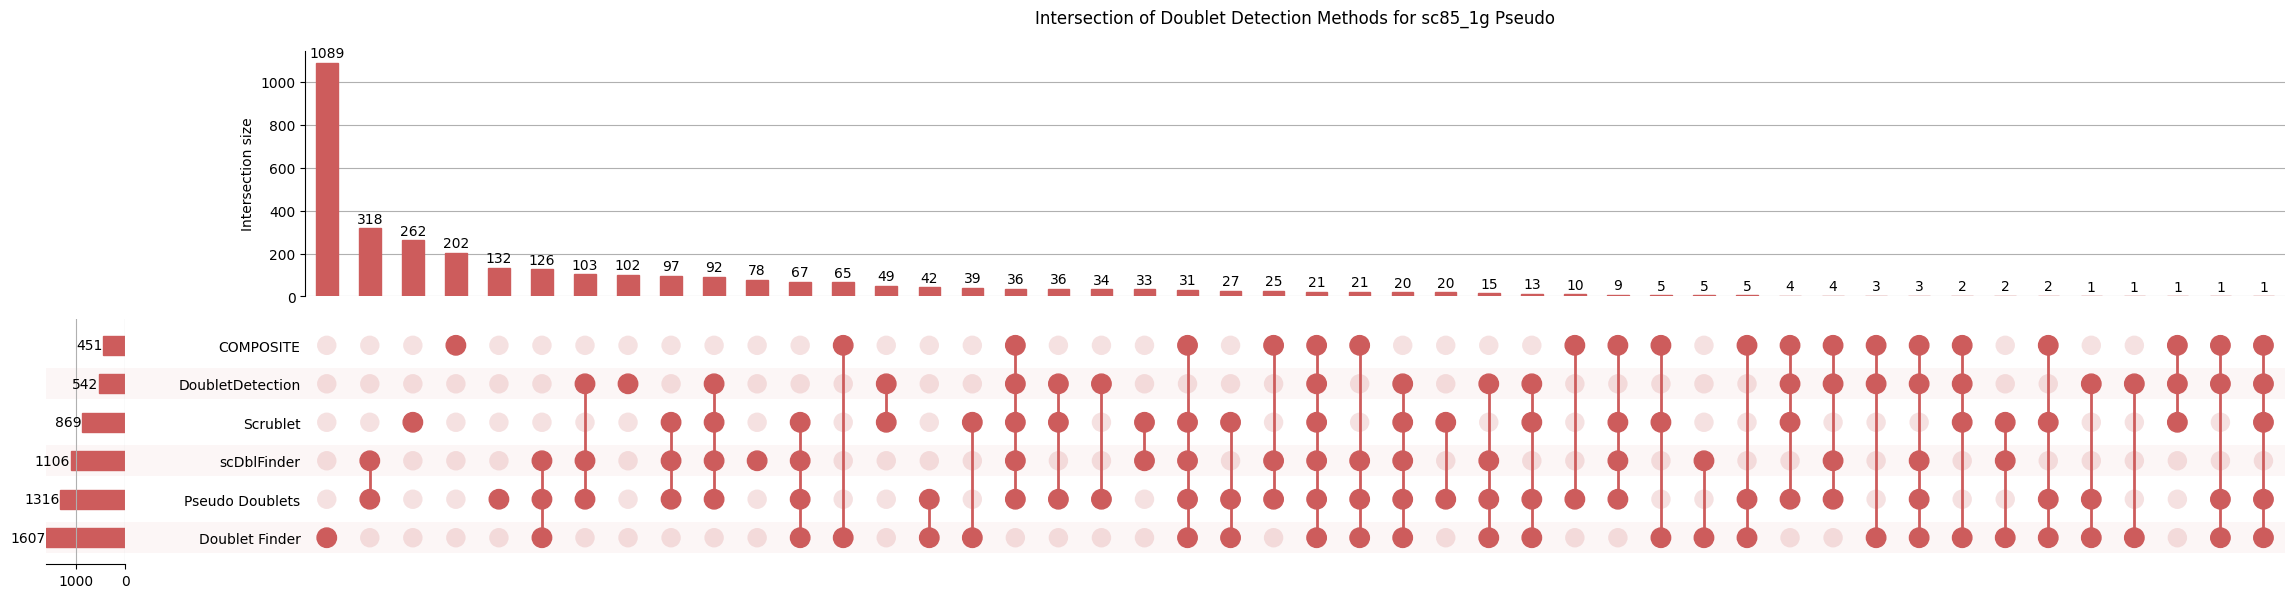

In [9]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
scrublet_ids = set(scrublet_ids)
pseudo_ids = set(pseudo_ids)
dblfinder_ids = set(dblfinder_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'Scrublet': set(scrublet_ids),
    'Pseudo Doublets' : set(pseudo_ids),
    'Doublet Finder' : set(dblfinder_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_1g Pseudo', pad=20)
plt.savefig("sc85_1g_pseudo.png")

#### Pseudo 2.0

In [10]:
composite_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/COMPOSITE_sc85_1g_pseudo_2.0_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/scDblFinder_sc85_1g_pseudo_2.0_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/DoubletDetection_sc85_1g_pseudo_2.0_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
scrublet_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/Scrublet_sc85_1g_pseudo_2.0_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
pseudo_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/pseudo_sc85_1g_2.0_ids.txt"
pseudo_ids = txt_to_array(pseudo_id_path)
dblfinder_id_path = data_path = r"./PseudoDoublets/sc85_1g_IDs/DoubletFinder_pseudo_sc85_1g_2.0_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

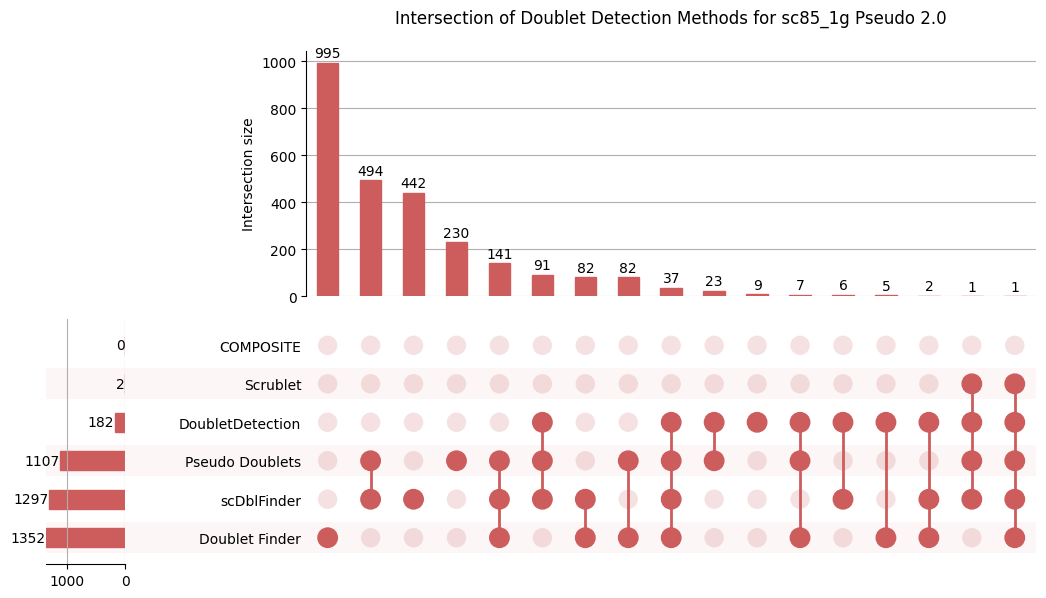

In [11]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
scrublet_ids = set(scrublet_ids)
pseudo_ids = set(pseudo_ids)
dblfinder_ids = set(dblfinder_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'Scrublet': set(scrublet_ids),
    'Pseudo Doublets' : set(pseudo_ids),
    'Doublet Finder' : set(dblfinder_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_1g Pseudo 2.0', pad=20)
plt.savefig("sc85_1g_pseudo_2.0.png")

#### sc85_3g Data Set

In [23]:
composite_id_path = data_path = r"./IDs/COMPOSITE_sc85_3g_atac_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./IDs/scDblFinder_sc85_3g_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./IDs/DblDetect_sc85_3g_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
dblfinder_id_path = data_path = r"./IDs/DoubletFinder_sc85_3g_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)
scrublet_id_path = data_path = r"./IDs/Scrublet_sc85_3g_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
vaeda_id_path = data_path = r"./IDs/vaeda_sc85_3g_ids.txt"
vaeda_ids = txt_to_array(vaeda_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

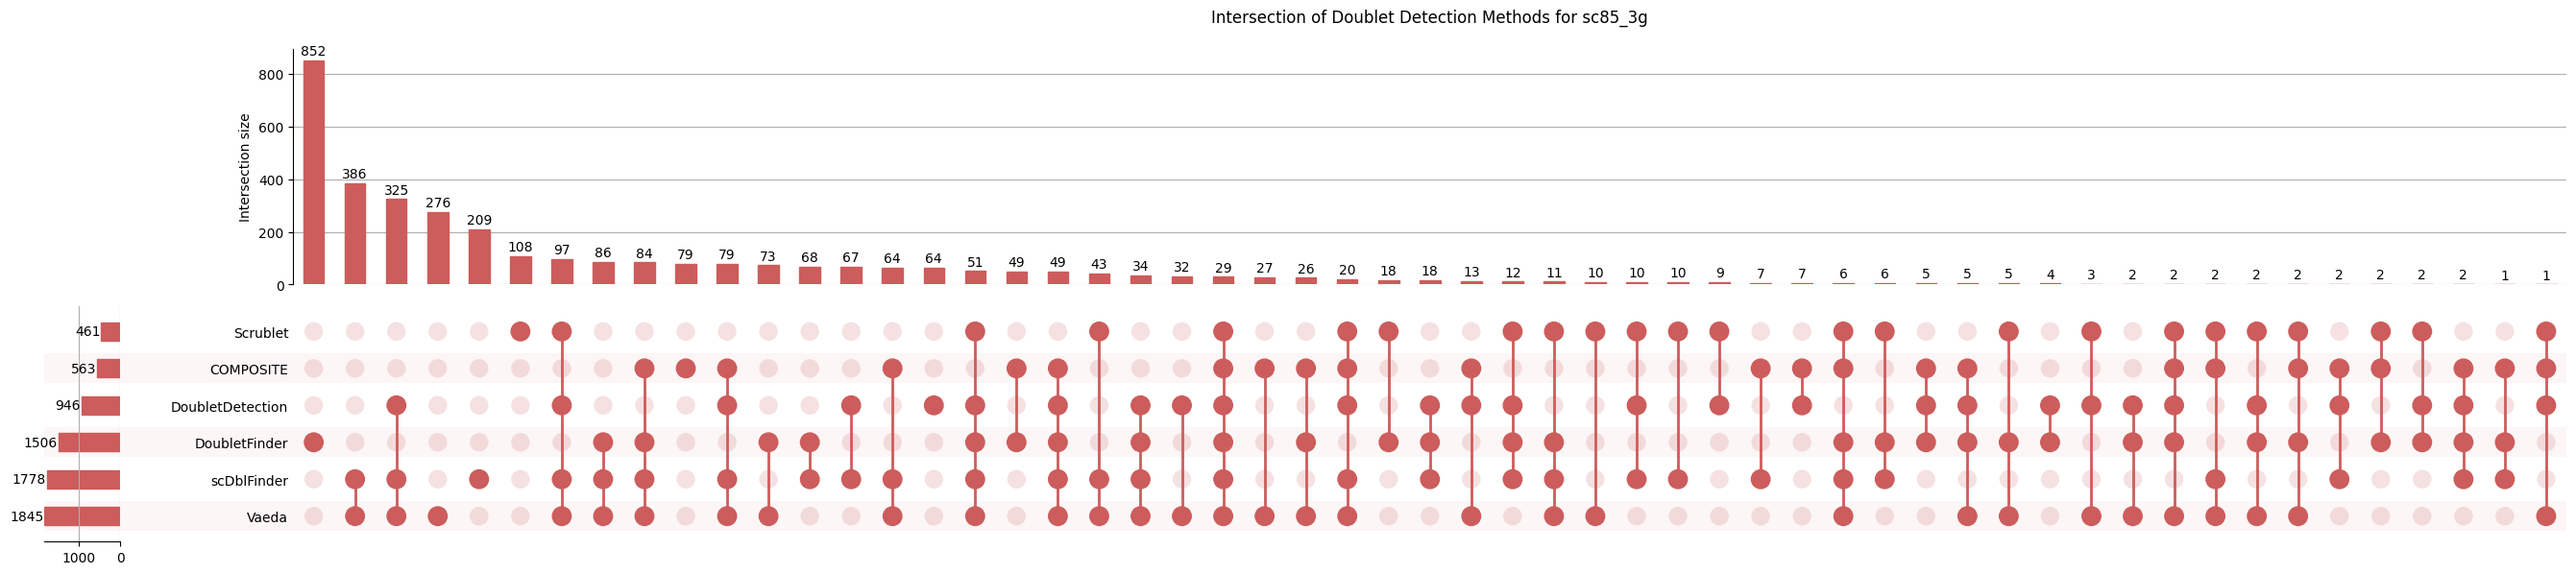

In [24]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
dblfinder_ids = set(dblfinder_ids)
scrublet_ids = set(scrublet_ids)
vaeda_ids = set(vaeda_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'DoubletFinder': set(dblfinder_ids),
    'Scrublet': set(scrublet_ids),
    'Vaeda' : set(vaeda_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_3g', pad=20)
plt.savefig("sc85_3g_UPSET.png")

In [25]:
print(len(all_cells))

3456


In [26]:
union_cells = np.array(all_cells)
np.save('doublets_sc85_3g.npy', union_cells)

#### Pseudo 1.0

In [14]:
composite_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/COMPOSITE_sc85_3g_pseudo_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/scDblFinder_sc85_3g_pseudo_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/DoubletDetection_sc85_3g_pseudo_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
scrublet_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/Scrublet_sc85_3g_pseudo_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
pseudo_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/pseudo_sc85_3g_ids.txt"
pseudo_ids = txt_to_array(pseudo_id_path)
dblfinder_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/DoubletFinder_pseudo_sc85_3g_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

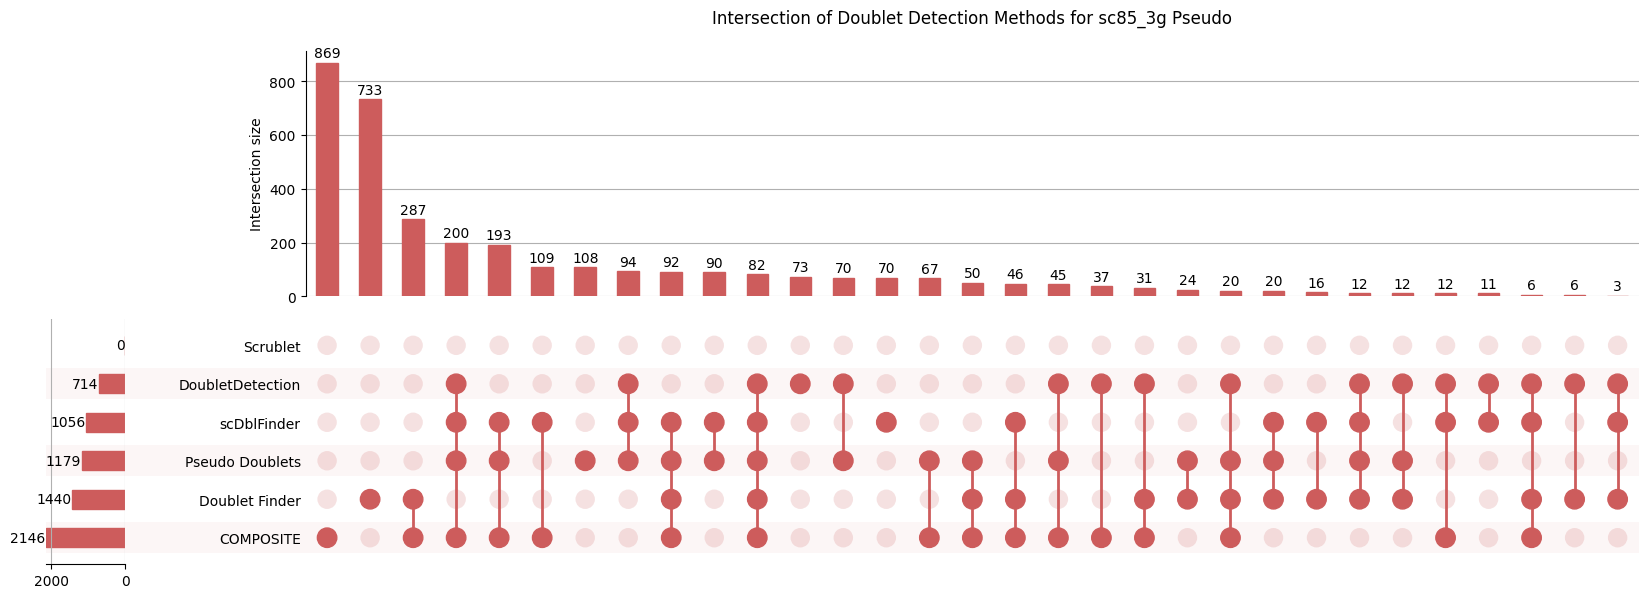

In [15]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
scrublet_ids = set(scrublet_ids)
pseudo_ids = set(pseudo_ids)
dblfinder_ids = set(dblfinder_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'Scrublet': set(scrublet_ids),
    'Pseudo Doublets' : set(pseudo_ids),
    'Doublet Finder' : set(dblfinder_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_3g Pseudo', pad=20)
plt.savefig("sc85_3g_pseudo.png")

#### Pseudo 2.0

In [16]:
composite_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/COMPOSITE_sc85_3g_pseudo_2.0_ids.txt"
composite_ids = txt_to_array(composite_id_path)
scDblFinder_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/scDblFinder_sc85_3g_pseudo_2.0_ids.txt"
scDblFinder_ids = txt_to_array(scDblFinder_id_path)
dbldetect_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/DoubletDetection_sc85_3g_pseudo_2.0_ids.txt"
dbldetect_ids = txt_to_array(dbldetect_id_path)
scrublet_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/Scrublet_sc85_3g_pseudo_2.0_ids.txt"
scrublet_ids = txt_to_array(scrublet_id_path)
pseudo_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/pseudo_sc85_3g_2.0_ids.txt"
pseudo_ids = txt_to_array(pseudo_id_path)
dblfinder_id_path = data_path = r"./PseudoDoublets/sc85_3g_IDs/DoubletFinder_pseudo_sc85_3g_2.0_ids.txt"
dblfinder_ids = txt_to_array(dblfinder_id_path)

C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\leeh1\McKinnonRosatiLab\jl\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

<Figure size 1200x800 with 0 Axes>

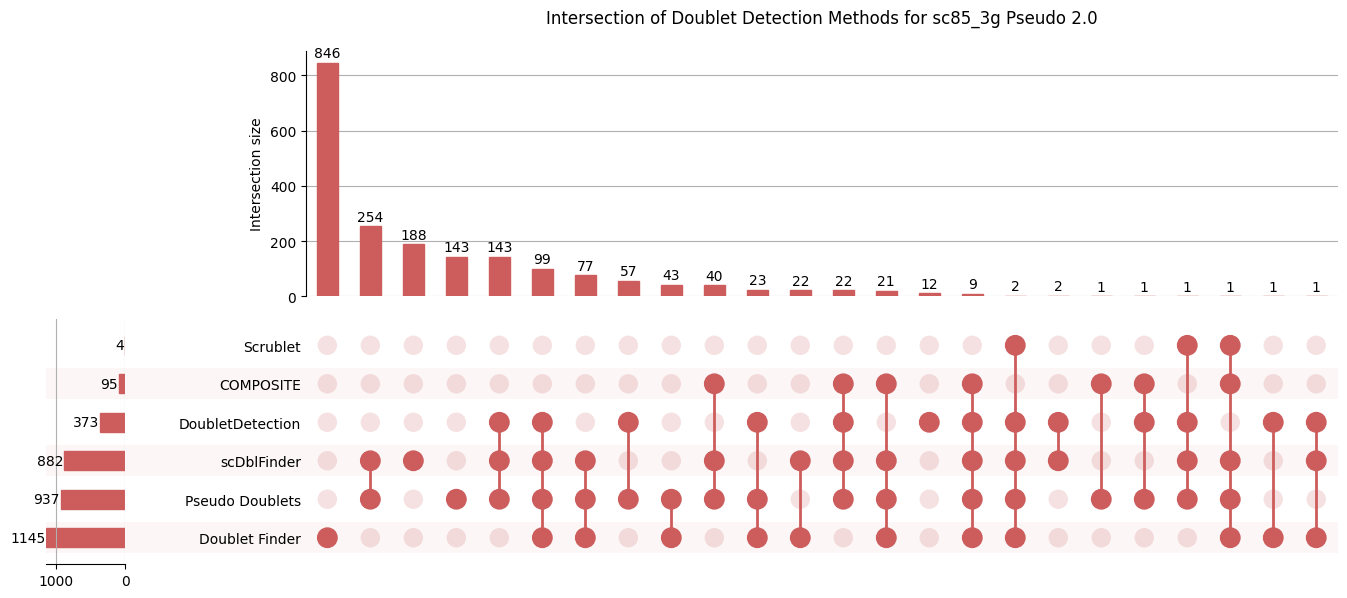

In [17]:
composite_ids = set(composite_ids)
scDblFinder_ids = set(scDblFinder_ids)
dbldetect_ids = set(dbldetect_ids)
scrublet_ids = set(scrublet_ids)
pseudo_ids = set(pseudo_ids)
dblfinder_ids = set(dblfinder_ids)

sets_dict = {
    'COMPOSITE': set(composite_ids),
    'scDblFinder': set(scDblFinder_ids),
    'DoubletDetection': set(dbldetect_ids),
    'Scrublet': set(scrublet_ids),
    'Pseudo Doublets' : set(pseudo_ids),
    'Doublet Finder' : set(dblfinder_ids)
}

all_cells = sorted(set.union(*sets_dict.values()))

membership_dict = {
    cell_id: {method: 1 if cell_id in cell_set else 0 for method, cell_set in sets_dict.items()}
    for cell_id in all_cells
}

data = pd.DataFrame.from_dict(membership_dict, orient='index')

upset_data = data.value_counts()
plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, sort_by='cardinality', show_counts=True, min_subset_size=1, element_size=40, facecolor='indianred')
upset.plot()
plt.title('Intersection of Doublet Detection Methods for sc85_3g Pseudo 2.0', pad=20)
plt.savefig("sc85_3g_pseudo_2.0.png")